In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math 
%matplotlib inline

In [86]:

pd.options.display.max_columns = None

# DATA SOURCE


DrivenData. (2015). Pump it Up: Data Mining the Water Table. Retrieved [December 3 2024] from https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table.

# Data Underdstanding

In [87]:
#Test Data
test_set_values_df = pd.read_csv("data/Test_set_values.csv")
test_set_values_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [88]:
# Data to be used
Training_set_values_df = pd.read_csv("data/Training_set_values.csv")
Training_set_values_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [89]:
# Predictor y label
Training_set_labels_df = pd.read_csv("data/Training_set_labels.csv")
Training_set_labels_df

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [90]:
# Merge Dataset
# Merging the train x data to its y predictor
df_merge = pd.merge(Training_set_labels_df,Training_set_values_df,how= "inner", on = "id")

In [91]:
df_merge.sample(20)

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
1037,15666,functional needs repair,0.0,2013-01-16,Lips,132,District Council,39.443328,-1.003619e+01,Kwa Bitsimba,0,Ruvuma / Southern Coast,Mwenge,Lindi,80,23,Lindi Rural,Chiponda,1,True,GeoData Consultants Ltd,VWC,LIPS Water Scheme,False,2004,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
44681,55125,functional,0.0,2013-02-23,Amref,1288,AMREF,34.603908,-1.615796e+00,Nyansurura Primary School,0,Lake Victoria,Mto Mara,Mara,20,2,Serengeti,Kebanchabancha,500,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,other,other,unknown,unknown,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
45256,32812,non functional,0.0,2011-02-25,African,379,Kuwait,37.442474,-6.308774e+00,Kwa Mfaume,0,Wami / Ruvu,Miembeni,Morogoro,5,6,Mvomero,Mvomero,1,False,GeoData Consultants Ltd,Private operator,NaN,True,2009,other,other,other,private operator,commercial,never pay,never pay,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,other,other
46727,37173,functional needs repair,0.0,2011-07-18,NaN,0,NaN,33.765223,-9.152142e+00,Kwa Mzee Katule,0,Lake Nyasa,Bijingijila,Mbeya,12,4,Rungwe,Kandete,0,True,GeoData Consultants Ltd,VWC,M,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
55696,50358,functional,0.0,2011-03-16,Cmsr,0,Gove,35.518082,-5.889496e+00,Nholo,0,Internal,Azimio,Dodoma,1,6,Bahi,Ilindi,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
54175,28133,functional,0.0,2011-07-27,Ministry Of Water,0,DWE,33.339000,-3.253183e+00,Bomba La Sokoni,0,Lake Victoria,Ilula Mashariki,Mwanza,19,4,Kwimba,Hungumalwa,0,True,GeoData Consultants Ltd,VWC,MMILUKI,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
49463,37006,non functional,0.0,2011-03-12,Solidame,253,SOLIDAME,36.649680,-8.148184e+00,Kwaliheta,0,Rufiji,Mahutanga A,Morogoro,5,3,Kilombero,Lumemo,105,True,GeoData Consultants Ltd,NaN,NaN,True,2003,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
33497,68710,functional,50.0,2013-02-07,Water Project Mbawala Chini,80,Water Project Mbawala chini,40.125023,-1.038373e+01,Shule Ya Msingi Mwenge,0,Ruvuma / Southern Coast,Mwenge,Mtwara,9,5,Mtwara Urban,Ufukoni,440,True,GeoData Consultants Ltd,WUG,Water Project Mbawala chini,True,2008,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
45699,27017,functional,0.0,2011-07-27,Jbg,0,JBG,30.546012,-2.456678e+00,Nakajwala,0,Lake Victoria,Mkagugo,Kagera,18,30,Ngara,Mugoma,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,other,other
24278,55725,functional,0.0,2013-03-25,Government Of Tanzania,1582,DWE,37.530640,-3.270713e+00,Kwa Emanuel Lyamuya,0,Pangani,Rengoni,Kilimanjaro,3,4,Moshi Rural,Marangu Mashariki,50,True,GeoData Consultants Ltd,VWC,Una mk

In [92]:
# Getting basic information on the merged dataset
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [93]:
# Checking the columns available in our dataset
df_merge.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [94]:
# finding the shape of our dataset
df_merge.shape

(59400, 41)

In [95]:
# finding unique values in each column

object_columns = df_merge.select_dtypes(include=['object','int64','float64']).columns

object_column_unique = {col : df_merge[col].nunique() for col in object_columns}

columns_unique_df =pd.DataFrame(list(object_column_unique.items()), columns= ['column_name', 'number_of_unique_values'])
columns_unique_df


,column_name,number_of_unique_values
0,id,59400
1,status_group,3
2,amount_tsh,98
3,date_recorded,356
4,funder,1897
5,gps_height,2428
6,installer,2145
7,longitude,57516
8,latitude,57517
9,wpt_name,37400


## Basic understanding of each of the columns based on their cardinality

**High Cardinality columns**
- id (59400) = Unique values are equal to the total number of rows of dataframe indicating its the unique identifier of the dataset
- longitude and latitude = indicates that the wells are spread on a huge geographical region
- wpt_name = indicates a large variety on water point names
- sub_villages = indicates wells are located on a high number of unique sub-villages

**Medium Cardinality columns**

- funder = indicates a huge number of funders i.e people who funded the project
- gps_height = indicates a large number of wells were built along multiple altitude heights
- ward -Indicates wells are found in multiple different wards
- installer - indicates that there are multiple organizations that have constructed wells in Tanzania
- scheme_name - Indicates there are a lot of different water schemes in the area
- amount_tsh (98)-  this represents the total static head this means the elevation between the free level of water till the discharge point of the pump

**Low Cardinality Columns**
- status group = indicates the three types of status a well might be i.e functional, non-functional, functional but in need of repair
- public meeting (2) = Indicates a boolean value where its either a yes or no
- management_group (5) = Indicates there are 5 unique ways a well may be managed
- permit (2) = shows a well can be built having a permit or no permit
- source_class = shows the classification of the source of the water



## numerical columns that are distinct
- id
- longitude and latitude
- region code 
- district code
- construction year


In [96]:
df_merge.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


- amount_total_static_head = the min amount is 0, the mean value is 317.65. There is also an indication that majority of the values are 0 because the 1st quartile and the median being 0
- gps_height = min value is -90 might indicate the wells are located below sea level
- population = min amount is 0. This might be an error or indicates that the area where the wells are have no poulation while the maximum is 30500

# Data Cleaning


In [97]:
# checking the number of null values in my dataset

df_merge.isna().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

There are missing value in the following columns
- funder 
- installer 
- sub_village
- public_meeting
- scheme_management
- scheme_name
- permit

All this are categorical columns and missing values might be caused by missed information in the data collection process


In [98]:
# checking the information contained on the columns with the missing values

missing_cols = df_merge.columns[df_merge.isnull().any()]

df_merge.loc[: ,missing_cols].sample(20)

,funder,installer,subvillage,public_meeting,scheme_management,scheme_name,permit
18144,Halmashauri Ya Wilaya Sikonge,Halmashauri ya wilaya sikonge,Kikungu Kusini,False,VWC,NaN,True
8395,Songea Municipal Counci,MWE,Ngandula,False,Other,NaN,True
3720,Unicef,DWE,Pembe La Mbogo,True,VWC,Mradi wa maji wa wino,True
2789,Private Individual,Da,Kibuba,True,Company,Bagamoyo wate,True
33663,World Bank,Water board,Kinua,True,VWC,World bank,True
46685,Ta,Tanz,Londo,True,VWC,NaN,False
50622,Norad,Norad,Garugila,True,VWC,NaN,True
26296,Government Of Tanzania,TCRS,Gezaulole,True,VWC,NaN,False
13228,NaN,NaN,Masa Juu,True,VWC,D,NaN
24638,Adb,DWE,Matanana,True,VWC,Ibiki gravity water scheme,False


In [99]:
# for categorical columns that explain extra information on the well we can fill null values by the word unknown i.e funder, installer , subvillage, scheme_management, scheme_name

df_merge[['funder', 'installer', 'subvillage','scheme_management','scheme_name']] = df_merge[['funder', 'installer', 'subvillage','scheme_management','scheme_name']].fillna("unknown")


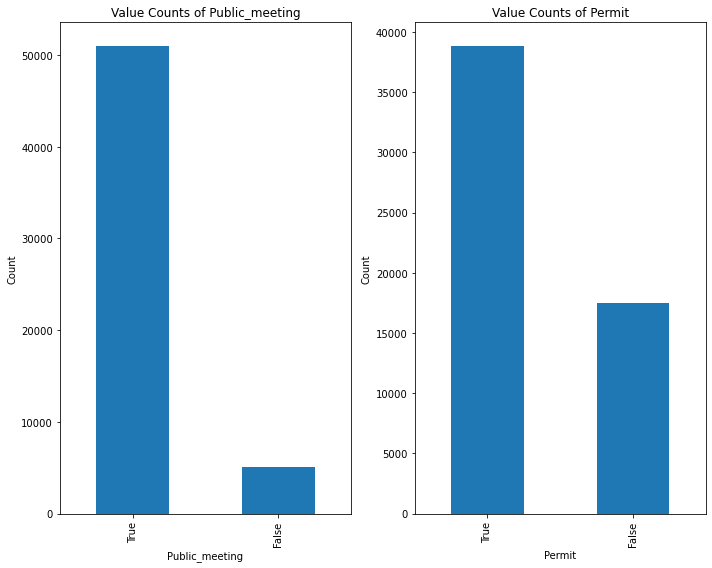

In [100]:
# for the remaining lets check the value counts as they are boolean values i.e between two choices

object_columns = df_merge.columns[df_merge.isna().any()]

fig,ax= plt.subplots(nrows= 1, ncols = 2 ,figsize=(10,8))

for i,col in enumerate(object_columns) :
    df_merge[col].value_counts().plot(kind= 'bar', ax= ax[i])
    ax[i].set_title(f'Value Counts of {col.capitalize()}') 
    ax[i].set_xlabel(col.capitalize()) 
    ax[i].set_ylabel('Count')

plt.tight_layout()
plt.show()



- We can see that most wells go through a public meeting before being built
- Most wells have permits before being built 

In [101]:
# filling missing values in both this fields by the modes of their columns

df_merge = df_merge.apply(lambda x: x.fillna(x.value_counts().index[0]))



In [102]:
df_merge.isna().sum()

id                       0
status_group             0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
s

In [103]:
# lets check for instances of duplication
# will check for duplicates in all columns except the first column i.e the primary key of this dataset

df_duplicated =df_merge[df_merge.iloc[:, 1:].duplicated(keep= False)]

In [104]:
sorted_duplicates = df_duplicated.sort_values(by=df_merge.columns[1:].tolist())
sorted_duplicates.head(20)

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
17451,29553,functional,0.0,2011-07-13,He,0,HE,31.61953,-1.793342e+00,Kahindu,0,Lake Victoria,Ikondoa,Kagera,18,3,Muleba,Ikondo,0,True,GeoData Consultants Ltd,VWC,unknown,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,improved spring,improved spring
39187,18713,functional,0.0,2011-07-13,He,0,HE,31.61953,-1.793342e+00,Kahindu,0,Lake Victoria,Ikondoa,Kagera,18,3,Muleba,Ikondo,0,True,GeoData Consultants Ltd,VWC,unknown,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,improved spring,improved spring
326,7900,functional,0.0,2011-07-18,Government Of Tanzania,0,Government,0.00000,-2.000000e-08,Hospital,0,Lake Victoria,Nyanza,Mwanza,19,6,Geita,Kalangalala,0,True,GeoData Consultants Ltd,VWC,Kalangalala,True,0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
28518,68204,functional,0.0,2011-07-18,Government Of Tanzania,0,Government,0.00000,-2.000000e-08,Hospital,0,Lake Victoria,Nyanza,Mwanza,19,6,Geita,Kalangalala,0,True,GeoData Consultants Ltd,VWC,Kalangalala,True,0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
40696,28134,functional,0.0,2011-07-18,Government Of Tanzania,0,Government,0.00000,-2.000000e-08,Hospital,0,Lake Victoria,Nyanza,Mwanza,19,6,Geita,Kalangalala,0,True,GeoData Consultants Ltd,VWC,Kalangalala,True,0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
301,70379,functional,0.0,2011-07-18,Government Of Tanzania,0,Government,0.00000,-2.000000e-08,Nersing College,0,Lake Victoria,Nyanza,Mwanza,19,6,Geita,Kalangalala,0,True,GeoData Consultants Ltd,VWC,Borehole,True,0,afridev,afridev,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump
56268,70312,functional,0.0,2011-07-18,Government Of Tanzania,0,Government,0.00000,-2.000000e-08,Nersing College,0,Lake Victoria,Nyanza,Mwanza,19,6,Geita,Kalangalala,0,True,GeoData Consultants Ltd,VWC,Borehole,True,0,afridev,afridev,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump
15097,64405,functional,0.0,2011-07-19,Government Of Tanzania,0,Government,0.00000,-2.000000e-08,K/Secondary,0,Lake Victoria,Kisese,Mwanza,19,6,Geita,Kalangalala,0,True,GeoData Consultants Ltd,VWC,14 Kambarage,True,0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
37439,56859,functional,0.0,2011-07-19,Government Of Tanzania,0,Government,0.00000,-2.000000e-08,K/Secondary,0,Lake Victoria,Kisese,Mwanza,19,6,Geita,Kalangalala,0,True,GeoData Consultants Ltd,VWC,14 Kambarage,True,0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
19733,32781,functional,0.0,2011-07-19,Government Of Tanzania,0,Government,0.00000,-2.000000e-08,Mulangila,0,Lake Victoria,14Kambalage,Mwanza,19,6,Geita,Kalangalala,0,True,GeoData Consultan

In [105]:
# Dropping duplicated data

df_merge = df_merge.drop_duplicates(subset = df_merge.columns[1:], keep= 'first')

In [106]:
df_merge.shape

(59364, 41)

In [107]:
df_cleaned = df_merge.copy()

# Univariate analysis

In [ ]:
# lets create visualisations to look at value counts of all data types that are object

object_columns = df_cleaned.select_dtypes(include = "object").columns


number_of_cols = 3
fig, axes = plt.subplots(nrows=  )

Index(['status_group', 'date_recorded', 'funder', 'installer', 'wpt_name',
       'basin', 'subvillage', 'region', 'lga', 'ward', 'recorded_by',
       'scheme_management', 'scheme_name', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')